In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import plotly.express as px
%matplotlib inline

## 1. Reading and Cleaning Income Data

In [2]:
# Reading data
income_data = pd.read_csv('CAINC1_PA_1969_2022.csv')

In [3]:
# Understanding the data
print(income_data.head(5))
print('\n\n')
print(income_data.tail(5))
print('\n\n')
print(income_data.sample(5))
print('\n\n')
print(income_data.shape)

    GeoFIPS       GeoName  Region TableName  LineCode IndustryClassification  \
0   "42000"  Pennsylvania     2.0    CAINC1       1.0                    ...   
1   "42000"  Pennsylvania     2.0    CAINC1       2.0                    ...   
2   "42000"  Pennsylvania     2.0    CAINC1       3.0                    ...   
3   "42001"     Adams, PA     2.0    CAINC1       1.0                    ...   
4   "42001"     Adams, PA     2.0    CAINC1       2.0                    ...   

                               Description                  Unit        1969  \
0  Personal income (thousands of dollars)   Thousands of dollars  45346106.0   
1                  Population (persons) 1/     Number of persons  11741000.0   
2  Per capita personal income (dollars) 2/               Dollars      3862.0   
3  Personal income (thousands of dollars)   Thousands of dollars    205176.0   
4                  Population (persons) 1/     Number of persons     56433.0   

         1970  ...         2013       

In [4]:
# Checking for nulls
income_data.isnull().sum()

GeoFIPS      0
GeoName      4
Region       4
TableName    4
LineCode     4
            ..
2018         4
2019         4
2020         4
2021         4
2022         4
Length: 62, dtype: int64

Industry Classification has missing data, which has been captured with '...' ; hence, this missing data would not show up when we search for nulls.  
  
The last 4 lines of the data are not part of the dataset, but are description of the dataset. Only the first column, GeoFIPS, is filled in these 4 lines, and the other columns have null values.  
  
The findings explain the null counts we see above.

In [5]:
# We are only interested in the per capita income
# This would remove the 
income_data = income_data[income_data.Description == 'Per capita personal income (dollars) 2/']
print(income_data.shape)

(68, 62)


In [6]:
# Resetting index to have sequential numbers
income_data.reset_index(drop = True, inplace = True)

In [7]:
# We are performing the analysis for last 3 years of available data
columns_of_interest = ['GeoFIPS','GeoName','2020','2021','2022']
income_data = income_data[columns_of_interest]

In [8]:
# Melting the columns to change from wide to long format
income_data = income_data.melt(id_vars = ['GeoFIPS','GeoName'], var_name = 'Year', value_name = 'Per_Capita_income')

In [9]:
# Checking for null values in transformed dataset
income_data.isnull().sum()

GeoFIPS              0
GeoName              0
Year                 0
Per_Capita_income    0
dtype: int64

In [10]:
# Standardizing data
income_data.GeoName = income_data.GeoName.str.replace(', PA','')
income_data.GeoFIPS = income_data.GeoFIPS.str.replace('"','')

In [11]:
print(income_data.head(5))
print('\n\n')
print(income_data.tail(5))
print('\n\n')
print(income_data.sample(5))

  GeoFIPS       GeoName  Year  Per_Capita_income
0   42000  Pennsylvania  2020            60320.0
1   42001         Adams  2020            53258.0
2   42003     Allegheny  2020            66014.0
3   42005     Armstrong  2020            49947.0
4   42007        Beaver  2020            52557.0



    GeoFIPS       GeoName  Year  Per_Capita_income
199   42125    Washington  2022            66276.0
200   42127         Wayne  2022            53076.0
201   42129  Westmoreland  2022            59493.0
202   42131       Wyoming  2022            54361.0
203   42133          York  2022            57321.0



    GeoFIPS     GeoName  Year  Per_Capita_income
128   42119       Union  2021            50578.0
179   42085      Mercer  2022            47857.0
99    42061  Huntingdon  2021            45915.0
143   42013       Blair  2022            55101.0
161   42049        Erie  2022            51396.0


In [12]:
# Checking dtypes
income_data.dtypes

GeoFIPS               object
GeoName               object
Year                  object
Per_Capita_income    float64
dtype: object

In [13]:
# Converting dtypes
income_data.Year = income_data.Year.astype('int')
income_data.GeoName = income_data.GeoName.astype('category')
income_data.dtypes

GeoFIPS                object
GeoName              category
Year                    int32
Per_Capita_income     float64
dtype: object

## 2. Reading and Cleaning Water Quality Data

### 2.1 Reading data

In [14]:
# Setting the column names
header = ['PWS_ID', 'PWS_Name', 'EPA_Region', 'Primary_Agency', 'PWS_Type', 'Population_Served', 
          'Cities_Served', 'Counties_Served', 'No_of_Facilities', 'No_of_Violations', 'No_of_Site_Visits',
          'Year', 'Quarter']

# Initialising empty dataframe to store quarterly data
water_data = pd.DataFrame(columns = header)


# Reading and storing quarterly data
for yr in range (2020,2023):
    for qrt in range(1,5):
        water_data_temp = pd.read_excel(f'Water System Summary_{yr}Q{qrt}.xlsx') # Format of file names
        
        print(f'Reading {water_data_temp.iloc[1][0]}') # This cell tells us about the dataset year and quarter for PA
        water_data_temp['Year'] = yr
        water_data_temp['Quarter'] = qrt
        water_data_temp.columns = header
        
        # The first 4 lines of each quarterly data sheet has the dataset description, which we do not need to load in df.
        water_data = pd.concat([water_data, water_data_temp.iloc[4:]], ignore_index = True)
        print(f'Shape of quarterly data: {water_data_temp.iloc[4:].shape}')
        print(f'Shape of yearly data after appending quarterly data: {water_data.shape}')
        print('\n\n')

Reading Report Filters: Submission Year is 2020 and Quarter is 1 and EPA Region in (03) and Primacy Agency in (PA) and Activity Status is A
Shape of quarterly data: (8152, 13)
Shape of yearly data after appending quarterly data: (8152, 13)



Reading Report Filters: Submission Year is 2020 and Quarter is 2 and EPA Region in (03) and Primacy Agency in (PA) and Activity Status is A
Shape of quarterly data: (8125, 13)
Shape of yearly data after appending quarterly data: (16277, 13)



Reading Report Filters: Submission Year is 2020 and Quarter is 3 and EPA Region in (03) and Primacy Agency in (PA) and Activity Status is A
Shape of quarterly data: (8111, 13)
Shape of yearly data after appending quarterly data: (24388, 13)



Reading Report Filters: Submission Year is 2020 and Quarter is 4 and EPA Region in (03) and Primacy Agency in (PA) and Activity Status is A
Shape of quarterly data: (8100, 13)
Shape of yearly data after appending quarterly data: (32488, 13)



Reading Report Filters: S

In [15]:
# Understanding data
print(water_data.head(5))
print('\n\n')
print(water_data.tail(5))
print('\n\n')
print(water_data.sample(10))
print('\n\n')
print(water_data.shape)

      PWS_ID                        PWS_Name EPA_Region Primary_Agency  \
0  PA7011024       BACK TO BASICS CHILD CARE   Region 3   Pennsylvania   
1  PA5650406              BRUCETON PETROLEUM   Region 3   Pennsylvania   
2  PA5650409        GLASSMERE FOOD MART #251   Region 3   Pennsylvania   
3  PA3390330  MIRACLE LEAGUE OF THE LV FIELD   Region 3   Pennsylvania   
4  PA6160891            COOK FOREST FUN PARK   Region 3   Pennsylvania   

                             PWS_Type Population_Served Cities_Served  \
0  Non-Transient non-community system                44           NaN   
1      Transient non-community system                25           NaN   
2      Transient non-community system               250           NaN   
3      Transient non-community system                50           NaN   
4      Transient non-community system                25           NaN   

  Counties_Served No_of_Facilities No_of_Violations No_of_Site_Visits  Year  \
0           Adams                3   

In [16]:
# Checking for nulls
water_data.isnull().sum()

PWS_ID                   0
PWS_Name                 0
EPA_Region               0
Primary_Agency           0
PWS_Type                 0
Population_Served        0
Cities_Served        96585
Counties_Served         24
No_of_Facilities         0
No_of_Violations         0
No_of_Site_Visits        0
Year                     0
Quarter                  0
dtype: int64

We see that Cities_served has null data. Since we are doing analysis by the counties, we can drop the column. Other columns that would not be used in our analysis are Primary_Agency (since we are looking specifically at PA) and EPA_Region (PA falls in EPA Region 3).  

Counties_Served too has null data, which is a cause of concern for us.

In [17]:
# Dropping the columns identified in above comments
water_data.drop(['EPA_Region', 'Primary_Agency', 'Cities_Served'], axis = 1, inplace = True)

In [18]:
# Looking at data where counties is not given, but violations have been recorded
print(water_data[(water_data.Counties_Served.isnull()) & water_data.No_of_Violations > 0 ].shape)
water_data[(water_data.Counties_Served.isnull()) & water_data.No_of_Violations > 0 ][['PWS_Name','Year']].value_counts().sort_index()

(24, 10)


PWS_Name                 Year
A CLEAR ALTERNATIVE      2020    4
                         2021    4
                         2022    4
JOHNSONS POOLS AND SPAS  2020    4
                         2021    4
                         2022    4
Name: count, dtype: int64

There are 2 facilities that have repeated water quality violations through time, but do not have a county assigned in the data set. We should look at the population percentage these PWS serve to. If the percentage is large, we can try to manually assign them to counties using research from existing online sources.  

We would particularly like to understand the effects of PWS that have caused water quality violations; hence, we are not filling in missing data for PWS that do not have a county assigned and did not cause a water quality violation.

In [19]:
num = water_data[(water_data.Counties_Served.isnull()) 
                      & water_data.No_of_Violations > 0 ].Population_Served.sum()
den = water_data.Population_Served.sum()
per = (num *100)/den
per

0.000395072830754513

Since these water supply providers are serving approximately only 0.0004% of the entire population in Pennsylvania across time, we are not manually assigning them counties. 
  
However, we decide to keep the missing data, in case we come across scenarios that absolutely requires us to estimate the counties for these water suppliers. We have found possible Pennsylvania counties for only two of the PWS found here using online resources.  
https://www.buzzfile.com/business/A-Clear-Alternative,-Inc-856-663-8088  
https://www.johnsonspools.com/water-deliveries

In [20]:
# Checking dtypes
water_data.dtypes

PWS_ID               object
PWS_Name             object
PWS_Type             object
Population_Served    object
Counties_Served      object
No_of_Facilities     object
No_of_Violations     object
No_of_Site_Visits    object
Year                 object
Quarter              object
dtype: object

In [21]:
# Multiple column type changing not working 
# water_data.iloc[:,6:] = water_data.iloc[:,6:].apply(pd.to_numeric)

water_data.Population_Served = water_data.Population_Served.astype('int')
water_data.No_of_Facilities = water_data.No_of_Facilities.astype('int')
water_data.No_of_Violations = water_data.No_of_Violations.astype('int')
water_data.No_of_Site_Visits = water_data.No_of_Site_Visits.astype('int')
water_data.Year = water_data.Year.astype('int')
water_data.Quarter = water_data.Quarter.astype('int')
water_data.PWS_Type = water_data.PWS_Type.astype('category')
water_data.dtypes

PWS_ID                 object
PWS_Name               object
PWS_Type             category
Population_Served       int32
Counties_Served        object
No_of_Facilities        int32
No_of_Violations        int32
No_of_Site_Visits       int32
Year                    int32
Quarter                 int32
dtype: object

## 3. Preparing for join

In [22]:
# Checking if all counties present in income data are present in water quality data as well
income_data.GeoName.isin(water_data.Counties_Served).value_counts()

GeoName
True     201
False      3
Name: count, dtype: int64

In [23]:
# Checking records from income data that do not find a county match in water quality data
income_data[income_data.GeoName.isin(water_data.Counties_Served) == False]

GeoFIPS       GeoName  Year  Per_Capita_income
0     42000  Pennsylvania  2020            60320.0
68    42000  Pennsylvania  2021            64042.0
136   42000  Pennsylvania  2022            64506.0

There are 3 records where the GeoName from income data is not present as county in water quality data. However, from our finding above, we can see these 3 records are state aggregated data at an yearly level. Hence, it is not a cause of concern if they do not find a match.

In [24]:
# Checking if all counties present in water quality data are present in income data as well
water_data.Counties_Served.isin(income_data.GeoName).value_counts()

Counties_Served
True     96561
False       24
Name: count, dtype: int64

In [25]:
# Checking counties from water quality data that do not find a match in income data
water_data[water_data.Counties_Served.isin(income_data.GeoName) == False][['Counties_Served','PWS_Name']]

Counties_Served                 PWS_Name
599               NaN      A CLEAR ALTERNATIVE
5691              NaN  JOHNSONS POOLS AND SPAS
8152              NaN      A CLEAR ALTERNATIVE
14481             NaN  JOHNSONS POOLS AND SPAS
16563             NaN      A CLEAR ALTERNATIVE
24363             NaN  JOHNSONS POOLS AND SPAS
24430             NaN      A CLEAR ALTERNATIVE
30018             NaN  JOHNSONS POOLS AND SPAS
33048             NaN      A CLEAR ALTERNATIVE
40510             NaN  JOHNSONS POOLS AND SPAS
40925             NaN      A CLEAR ALTERNATIVE
48186             NaN  JOHNSONS POOLS AND SPAS
48692             NaN      A CLEAR ALTERNATIVE
54753             NaN  JOHNSONS POOLS AND SPAS
57323             NaN      A CLEAR ALTERNATIVE
63457             NaN  JOHNSONS POOLS AND SPAS
64877             NaN      A CLEAR ALTERNATIVE
71107             NaN  JOHNSONS POOLS AND SPAS
73082             NaN      A CLEAR ALTERNATIVE
78373             NaN  JOHNSONS POOLS AND SPAS
80947             NaN      A CLEAR ALTERNATIVE
87555             NaN  JOHNSONS POOLS AND SPAS
88963             NaN      A CLEAR ALTERNATIVE
94771             NaN  JOHNSONS POOLS AND SPAS

We can see that out of the 24 records from water quality data, which are not able to find a match in income data, all have null counties. They belong to 'A CLEAR ALTERNATIVE' and 'JOHNSONS POOLS AND SPAS' and are expected to have null counties as analysed in previous section.

## 4. Joining data

### 4.1 Joining data for a view at county level data
  
County view will let us know how many water quality violations occured for each county across time. We will not retain PWS specific information.

In [26]:
# Grouping water quality data for each county to prepare for our join with income data
county_columns = ['Population_Served', 'Counties_Served', 'No_of_Facilities',
                  'No_of_Violations', 'No_of_Site_Visits', 'Year']

water_data_county_yearly = water_data[county_columns].groupby(['Counties_Served','Year']).agg(
                          {'Population_Served': 'max',
                           'No_of_Facilities': 'max',
                           'No_of_Violations': 'sum',
                           'No_of_Site_Visits': 'sum',
                          })

water_data_county_yearly.reset_index(inplace=True)

In [27]:
# Joining water quality data with income data on county and year
summary_data = pd.merge(water_data_county_yearly, income_data,  how='left', left_on = ['Counties_Served','Year'], right_on=['GeoName','Year'])

In [28]:
summary_data.isnull().sum()

Counties_Served      0
Year                 0
Population_Served    0
No_of_Facilities     0
No_of_Violations     0
No_of_Site_Visits    0
GeoFIPS              0
GeoName              0
Per_Capita_income    0
dtype: int64

### 4.2 Transforming data to create a view at PWS level data

PWS data view will let us know how many water quality violations occured for each PWS across time. We would also be able to map what county the PWS belongs to.

In [29]:
# Grouping water quality data for each county to prepare for our join with income data
PWS_columns = ['PWS_Name','PWS_Type','Population_Served','Counties_Served',
               'No_of_Facilities', 'No_of_Violations', 'No_of_Site_Visits', 'Year']

water_data_PWS = water_data[PWS_columns].groupby(['PWS_Name', 'Year','Counties_Served','PWS_Type']).agg(
                          {'Population_Served': 'max',
                           'No_of_Facilities': 'max',
                           'No_of_Violations': 'sum',
                           'No_of_Site_Visits': 'sum',
                           }).dropna()

water_data_PWS.reset_index(inplace=True)

In [30]:
water_data_PWS.shape

(24799, 8)

### 4.3 Transforming data to create a view at PWS Type

PWS type view will let us know how many water quality violations occured for each PWS Type across time. We would not be able to see other details.

In [31]:
PWS_Type_data = water_data[['PWS_Type','Year','No_of_Violations']].groupby(by =['PWS_Type','Year']).sum().reset_index()

### 4.4 Transforming data to create a view of water quality violations in counties at quarterly level

PWS type view will let us know how many water quality violations occured for each PWS Type across time. We would not be able to see other details.

In [32]:
county_columns = ['Population_Served', 'Counties_Served', 'No_of_Facilities',
                  'No_of_Violations', 'No_of_Site_Visits', 'Year','Quarter']

water_data_county_quarterly = water_data[county_columns].groupby(['Counties_Served','Year','Quarter']).agg(
                          {'Population_Served': 'max',
                           'No_of_Facilities': 'max',
                           'No_of_Violations': 'sum',
                           'No_of_Site_Visits': 'sum',
                          }).reset_index()

yr_qtr = water_data_county_quarterly.Year.astype('string') + ', Q' + water_data_county_quarterly.Quarter.astype('string')
water_data_county_quarterly.insert(loc = len(water_data_county_quarterly.columns),
                                  column = 'yr_qtr',
                                  value = yr_qtr)

## 5. Visualizations

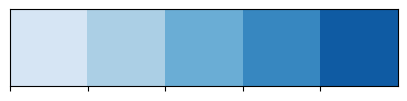

In [33]:
blue_palette = sns.color_palette("Blues", 5)
sns.palplot(blue_palette)
plt.show()

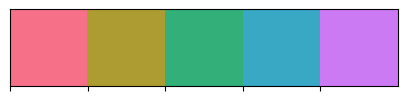

In [34]:
custom_palette_5 = sns.color_palette("husl", 5)
sns.palplot(custom_palette_5)
plt.show()

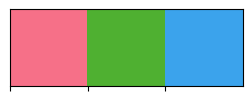

In [35]:
custom_palette_3 = sns.color_palette("husl", 3)
sns.palplot(custom_palette_3)
plt.show()

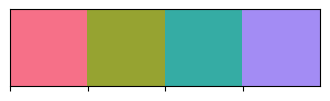

In [36]:
custom_palette_4 = sns.color_palette("husl", 4)
sns.palplot(custom_palette_4)
plt.show()

### 5.1 Visualzing water quality violations across counties and time to identifying counties of interest

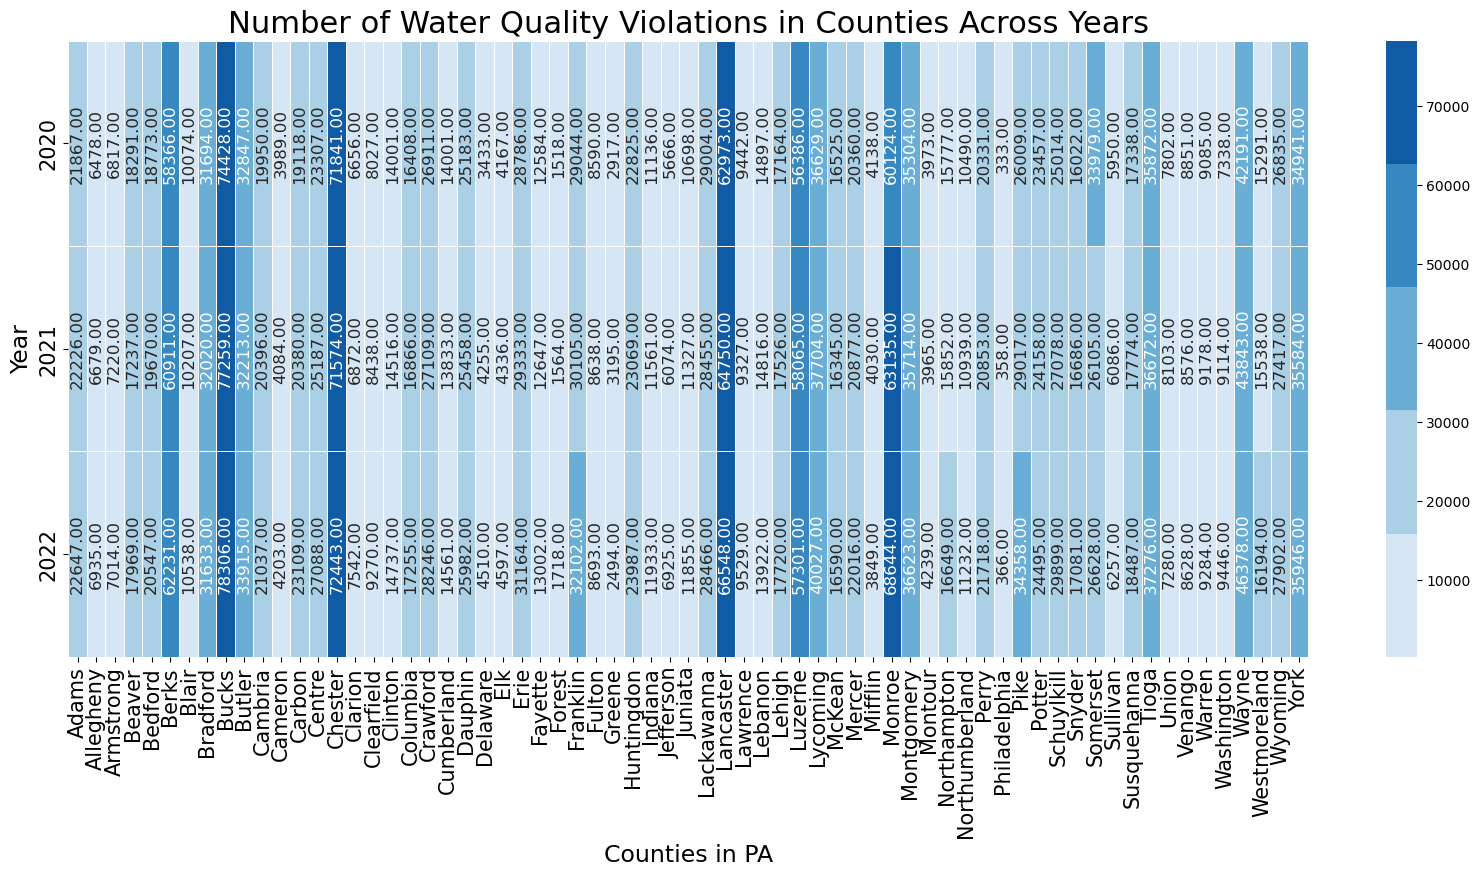

In [37]:
plt.figure(figsize=(20, 8))
columns_of_interest = ['Year', 'Counties_Served', 'No_of_Violations']
subset_data = summary_data[columns_of_interest].sort_values(by = ['Counties_Served'])
subset_data_hm = subset_data.pivot(index="Year", columns="Counties_Served", values="No_of_Violations")
sns.heatmap(subset_data_hm, annot=True, annot_kws={'rotation': 90, "fontsize":12}, cmap=blue_palette, fmt='.2f', linewidths=.5)
plt.title('Number of Water Quality Violations in Counties Across Years', fontsize = 22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Counties in PA', fontsize=17)
plt.ylabel('Year', fontsize=17)
plt.show()

The top 5 counties that stand out with highest numbers of violations  are 'Bucks', 'Chester', 'Lancaster', 'Luzerne' and 'Monroe'

### 5.2 Visualizing number of violations across PWS type and time to identify trends and water supplier type of interest

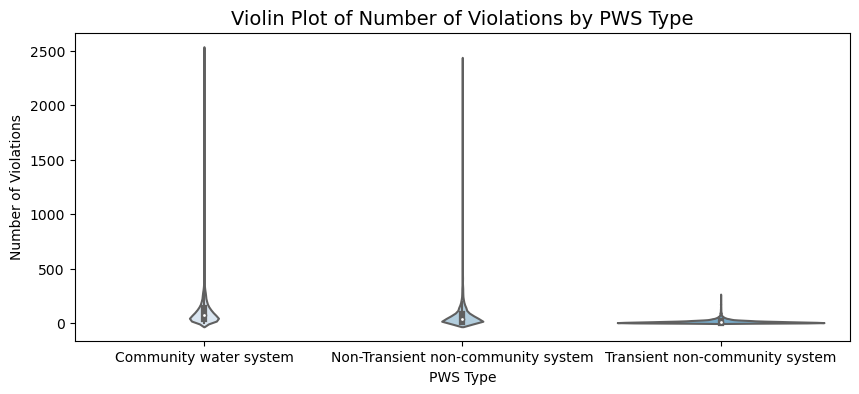

In [38]:
# Visualizing the number of violations across PWS Type
plt.figure(figsize=(10, 4))

sns.violinplot(x='PWS_Type', y='No_of_Violations',palette = blue_palette, data=water_data[water_data.No_of_Violations > 0])

plt.title('Violin Plot of Number of Violations by PWS Type', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('PWS Type', fontsize=10)
plt.ylabel('Number of Violations', fontsize=10)
plt.show()

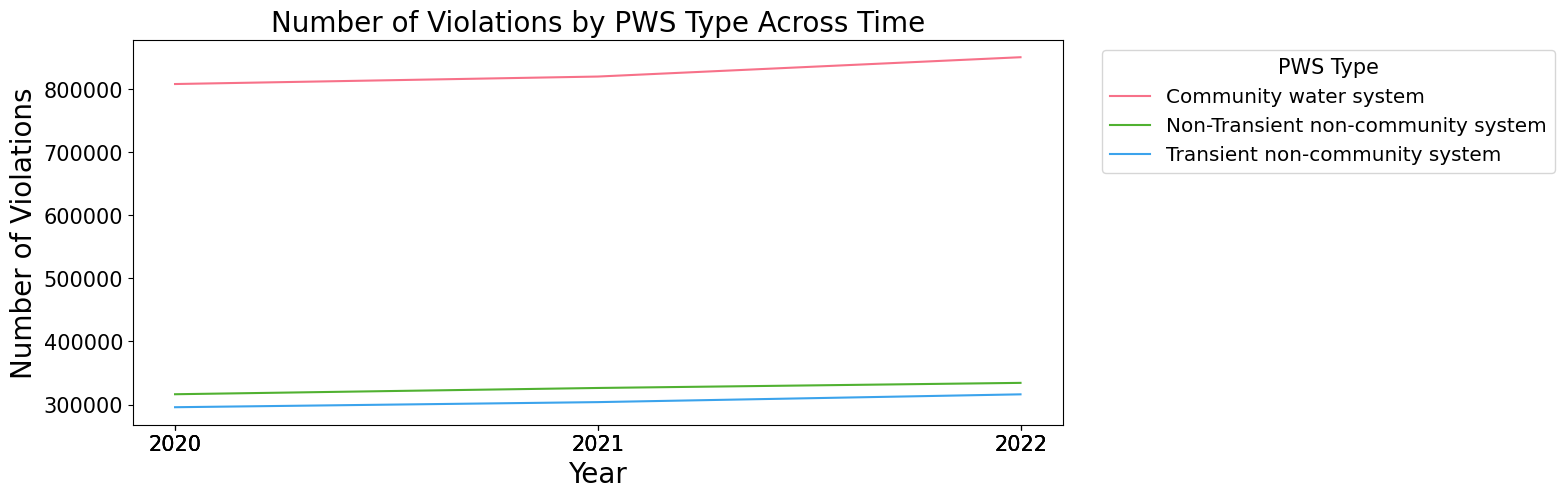

In [39]:
# Visualizing the number of violations across PWS Type
plt.figure(figsize=(12, 5))

ax = sns.lineplot(hue='PWS_Type', y='No_of_Violations',x = 'Year', data=PWS_Type_data, palette = custom_palette_3)

plt.title('Number of Violations by PWS Type Across Time', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Violations', fontsize=20)
plt.legend(title='PWS Type', bbox_to_anchor=(1.54, 1), fontsize='x-large', title_fontsize='15')    
ax.set_xticks(PWS_Type_data.Year)
ax.set_xticklabels(PWS_Type_data.Year)
plt.show()

In [40]:
water_data_PWS_subset = water_data_PWS[water_data_PWS.Year == 2022]
fig = px.treemap(water_data_PWS, 
                 path=['PWS_Type'], 
                 values='No_of_Violations',
                 title='Water Quality Violations in Pennsylvania in 2022 Viewed by PWS Type',
                 color_continuous_scale=custom_palette_3)
fig.data[0].textinfo = 'label+value'

fig.update_layout(
    uniformtext=dict(minsize=18, mode='hide'),
    margin = dict(t=50, l=25, r=25, b=25)
)
fig.show()

### 5.3 Visualization of correlation between per capita income and number of violations

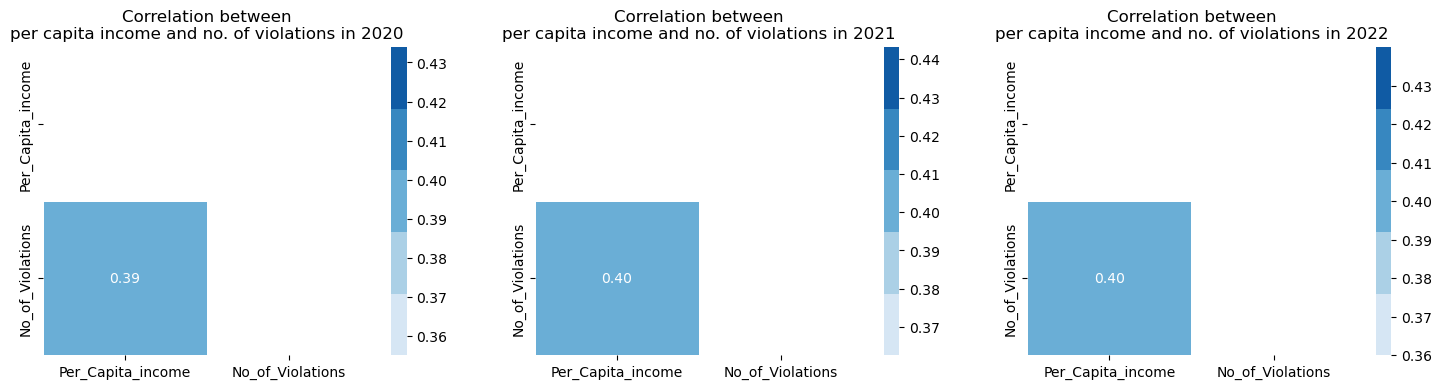

In [41]:
# We are interested to see if per capita income of a county is correlated with the no of violations in a county

columns_of_interest = ['Per_Capita_income', 'No_of_Violations']
subset_data_2020 = summary_data[summary_data.Year == 2020][columns_of_interest]
subset_data_2021 = summary_data[summary_data.Year == 2021][columns_of_interest]
subset_data_2022 = summary_data[summary_data.Year == 2022][columns_of_interest]


fig, axes = plt.subplots(1, 3, figsize=[18, 4])
correlation_matrix = subset_data_2020.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap= blue_palette, fmt='.2f', mask = mask, linewidths=.5, ax=axes[0])
axes[0].set_title('Correlation between\nper capita income and no. of violations in 2020')

correlation_matrix = subset_data_2021.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap=blue_palette, fmt='.2f', mask = mask, linewidths=.5, ax=axes[1])
axes[1].set_title('Correlation between\nper capita income and no. of violations in 2021')

correlation_matrix = subset_data_2022.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap=blue_palette, fmt='.2f', mask = mask, linewidths=.5, ax=axes[2])
axes[2].set_title('Correlation between\nper capita income and no. of violations in 2022')
plt.show()

### 5.4 Visualization of correlation between per capita income and number of violations in 2022

In [42]:
print(summary_data[summary_data.Year == 2022].Per_Capita_income.describe())
print(summary_data[summary_data.Year == 2022].No_of_Violations.describe())

count        67.000000
mean      55274.641791
std       11274.122138
min       28009.000000
25%       48506.500000
50%       52643.000000
75%       57519.000000
max      101051.000000
Name: Per_Capita_income, dtype: float64
count       67.000000
mean     22405.462687
std      17916.411321
min        366.000000
25%       9277.000000
50%      17720.000000
75%      29182.500000
max      78306.000000
Name: No_of_Violations, dtype: float64


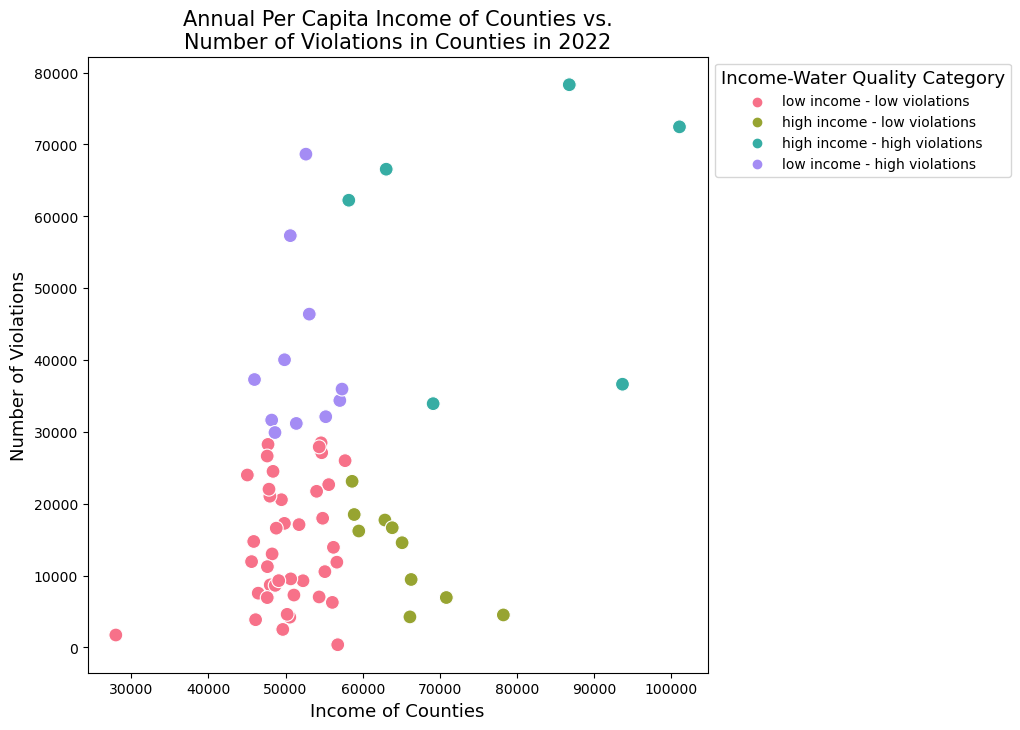

In [43]:
subset_data = summary_data[summary_data.Year == 2022]

# Making bins

percapitaincome2022_group = pd.cut(subset_data['Per_Capita_income'], 
                                        bins=[0,57837.500000,101051.000000], 
                                        labels=['low income','high income'])
noofviolations2022_group = pd.cut(subset_data['No_of_Violations'], 
                                        bins=[0,29182.500000, 109689.000000], 
                                        labels=['less violations', 'high violations'])
subset_data.insert(loc = len(subset_data.columns), column = 'percapitaincome2022_group', value = percapitaincome2022_group)
subset_data.insert(loc = len(subset_data.columns), column = 'noofviolations2022_group', value = noofviolations2022_group)

# Creatig a categorical variable for each bin
conditions = [
      (subset_data.percapitaincome2022_group == 'low income') & (subset_data.noofviolations2022_group == 'less violations')
    , (subset_data.percapitaincome2022_group == 'high income') & (subset_data.noofviolations2022_group == 'high violations')
    , (subset_data.percapitaincome2022_group == 'low income') & (subset_data.noofviolations2022_group == 'high violations')
    , (subset_data.percapitaincome2022_group == 'high income') & (subset_data.noofviolations2022_group == 'less violations')

]

choices  = [
      "low income - low violations"
    , "high income - high violations"
    , "low income - high violations"
    , "high income - low violations"
]
category = np.select(conditions, choices, "ERROR")
subset_data.insert(loc = len(subset_data.columns), column = 'category', value = category)

# Plotting a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Per_Capita_income', y='No_of_Violations', data=subset_data, s=100, hue = 'category', palette = custom_palette_4)
plt.xlabel('Income of Counties', fontsize = 13)
plt.ylabel('Number of Violations', fontsize = 13)
plt.title('Annual Per Capita Income of Counties vs.\nNumber of Violations in Counties in 2022', fontsize = 15)
plt.legend(title='Income-Water Quality Category', bbox_to_anchor=(1.5, 1), fontsize='medium', title_fontsize='13')    
plt.show()

### 5.5 Visualizing the number of violations in our counties of interest

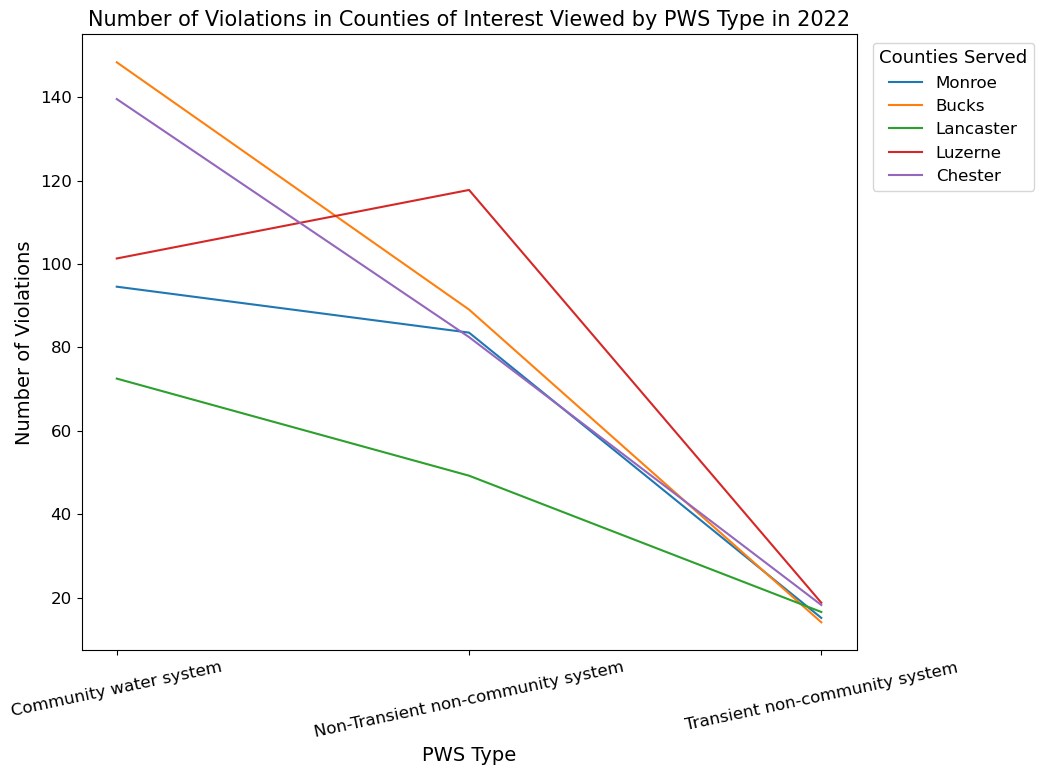

In [44]:
counties_of_highinterest = ['Bucks','Chester','Lancaster','Luzerne','Monroe']
water_data_subset = water_data[(water_data.Counties_Served.isin(counties_of_highinterest)) &(water_data.Year == 2022)]

plt.figure(figsize=(10,8))
sns.lineplot(errorbar=None,hue='Counties_Served', y='No_of_Violations', data=water_data_subset, x = 'PWS_Type')
plt.legend(title='Counties Served', bbox_to_anchor=(1.24, 1), fontsize='large', title_fontsize='13')    
plt.xticks(fontsize=12, rotation = 12)
plt.yticks(fontsize=12)
plt.xlabel('PWS Type', fontsize = 14)
plt.ylabel('Number of Violations', fontsize = 14)
plt.title('Number of Violations in Counties of Interest Viewed by PWS Type in 2022', fontsize = 15)
plt.show()

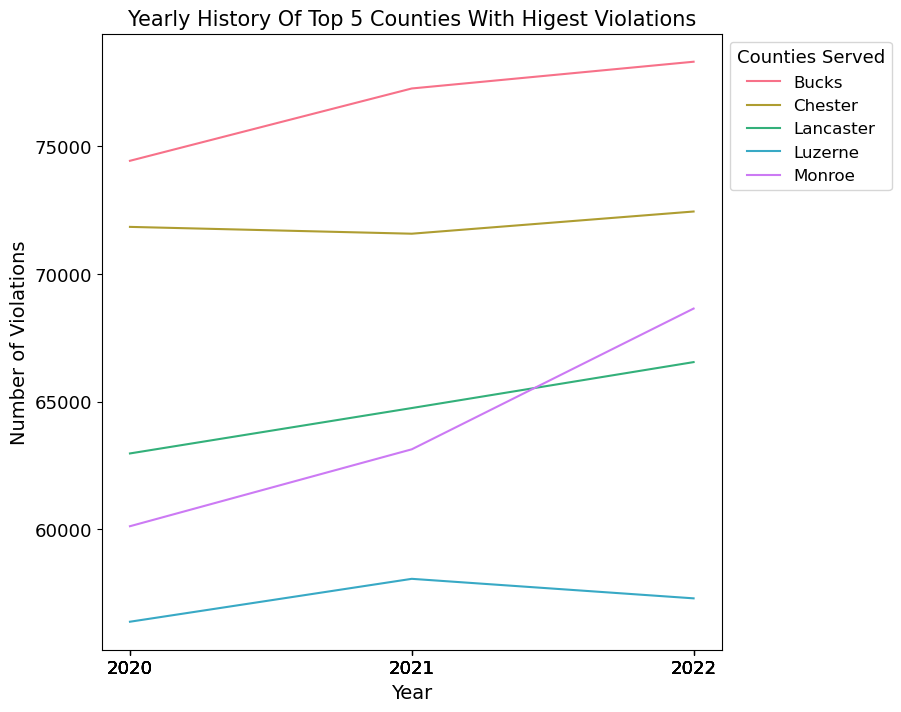

In [45]:
# We are interested in understanding water access and quality by counties
# Plotting a time series across top 5 counties with highest violations to check for patterns
counties_of_highinterest = ['Bucks','Chester','Lancaster','Luzerne','Monroe']
subset_data = summary_data[summary_data.Counties_Served.isin(counties_of_highinterest)]

plt.figure(figsize=(8,8))
ax = sns.lineplot(x='Year', y='No_of_Violations', palette = custom_palette_5, hue = subset_data.Counties_Served, data=subset_data)
plt.legend(title='Counties Served', bbox_to_anchor=(1, 1), fontsize='large', title_fontsize= 13)
plt.title('Yearly History Of Top 5 Counties With Higest Violations', fontsize = 15)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Violations', fontsize = 14)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
ax.set_xticks(subset_data.Year)
ax.set_xticklabels(subset_data.Year)
plt.show()

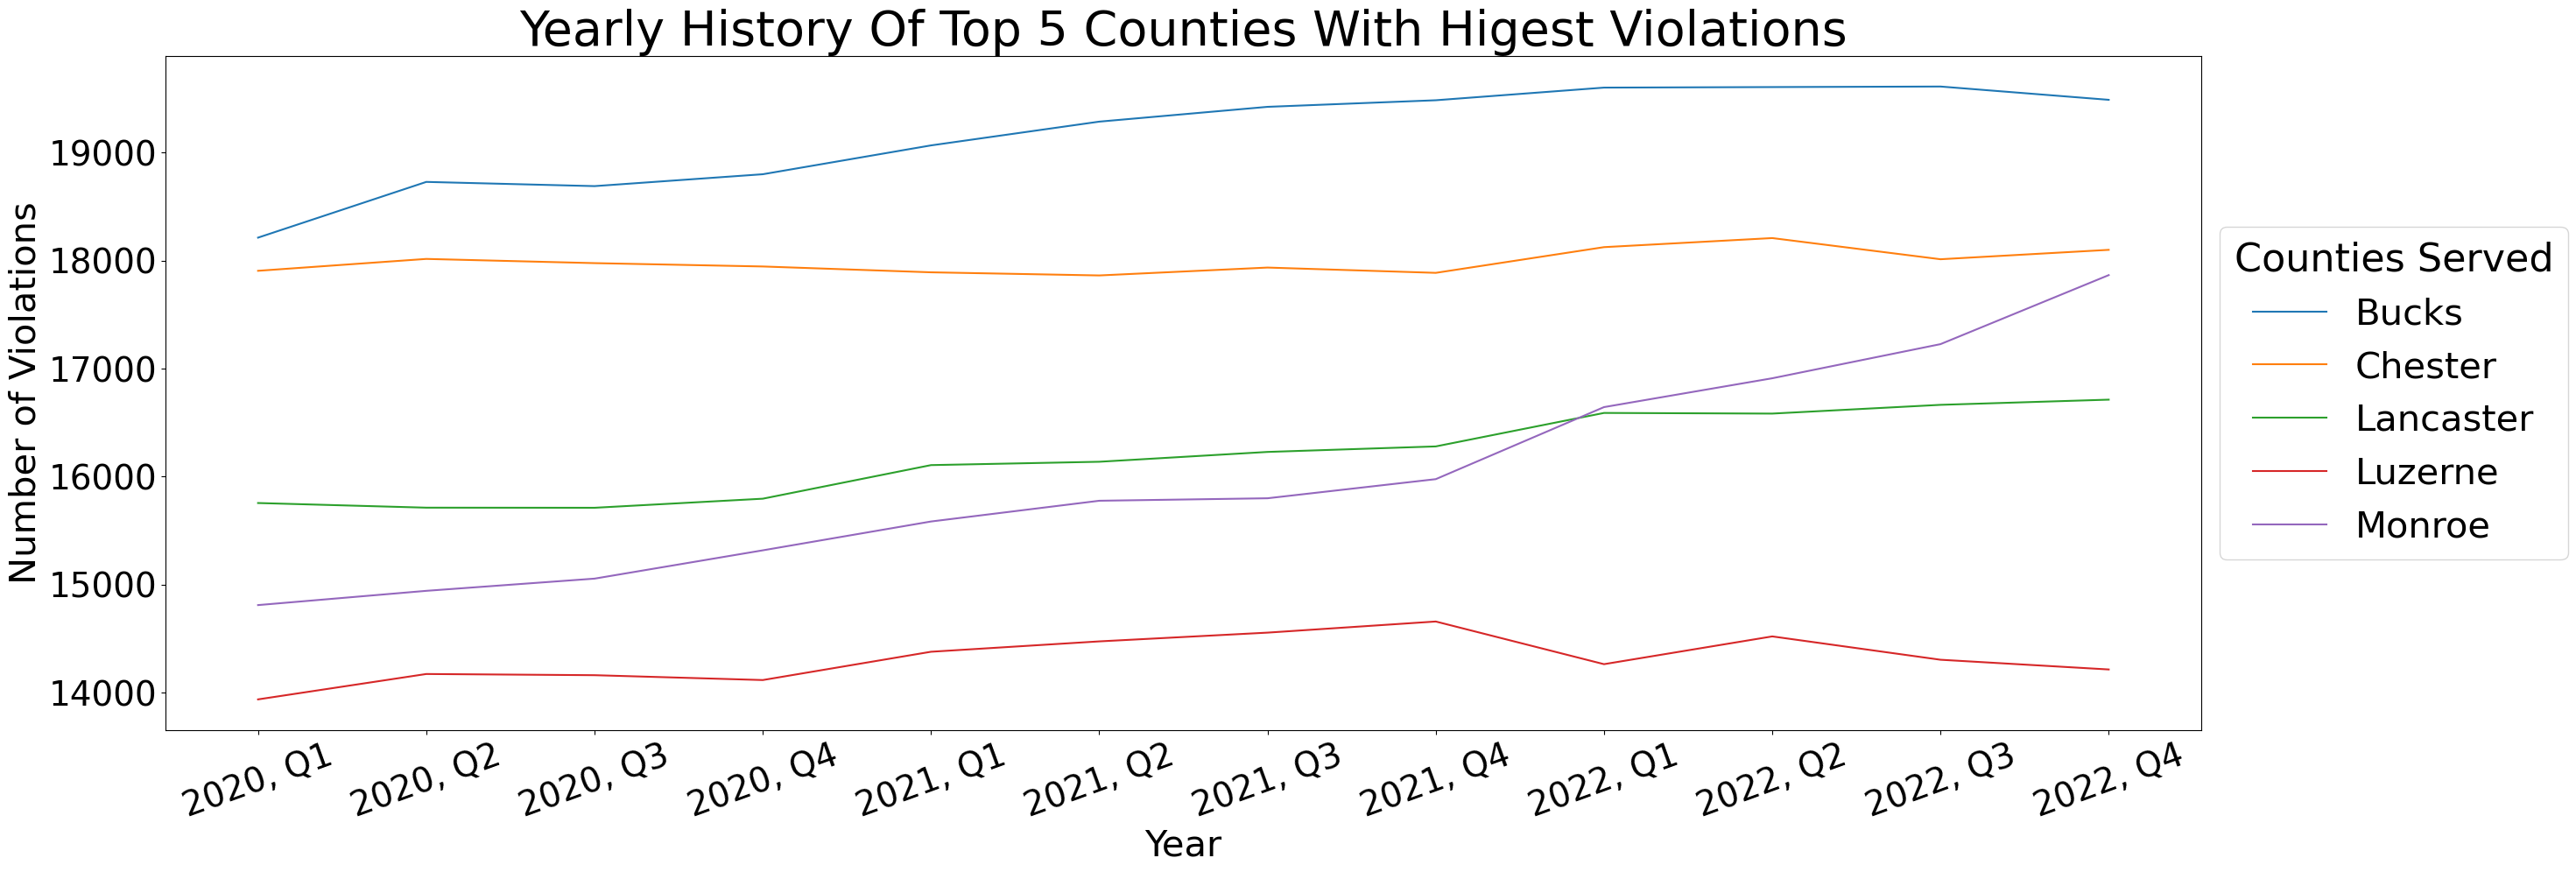

In [46]:
# We are interested in understanding water access and quality by counties
# Plotting a time series across top 5 counties with highest violations to check for patterns
counties_of_highinterest = ['Bucks','Chester','Lancaster','Luzerne','Monroe']
water_data_county_quarterly_subset = water_data_county_quarterly[water_data_county_quarterly.Counties_Served.isin(counties_of_highinterest)]
plt.figure(figsize=(30,10))
sns.lineplot(x='yr_qtr', y='No_of_Violations', hue = water_data_county_quarterly_subset.Counties_Served, data=water_data_county_quarterly_subset)
plt.legend(title='Counties Served', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=30, title_fontsize = 32)    
plt.title('Yearly History Of Top 5 Counties With Higest Violations', fontsize = 40)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('Number of Violations', fontsize = 30)
plt.yticks(fontsize=28)
plt.xticks(fontsize=28, rotation = 20)
plt.show()


In [47]:
water_data_county_quarterly_subset = water_data_county_quarterly_subset[water_data_county_quarterly_subset.Year == 2022]
fig = px.treemap(water_data_county_quarterly_subset, 
                 path=['Counties_Served'], 
                 values='No_of_Violations',
                 title='Water Quality Violations in Pennsylvania Counties in 2022',
                 color_continuous_scale=custom_palette_5)
fig.data[0].textinfo = 'label+value'
fig.update_layout(
    uniformtext=dict(minsize=18, mode='hide'),
    margin = dict(t=50, l=25, r=25, b=25)
)

fig.show()

In [48]:
columns_of_interest = ['Year', 'PWS_Name', 'Counties_Served', 'No_of_Violations']
subset_data = water_data_PWS[(water_data_PWS.Counties_Served.isin(counties_of_highinterest)) & (water_data_PWS.Year == 2022)][columns_of_interest]

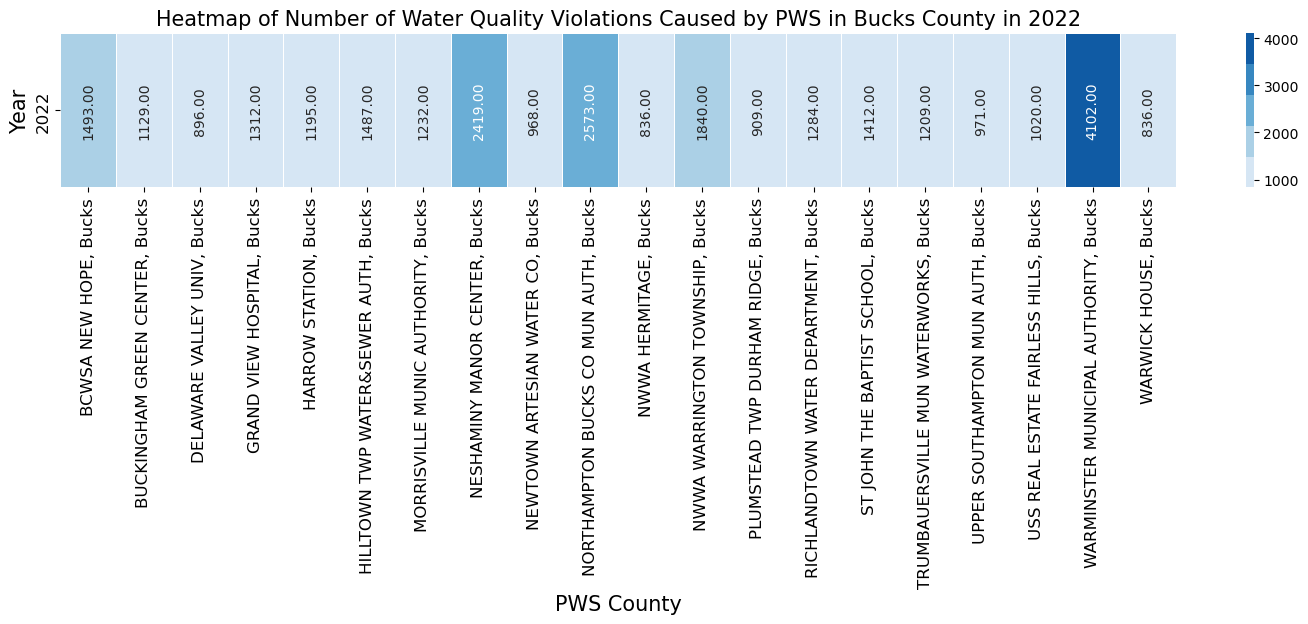

In [49]:
subset_data_bucks = subset_data[subset_data.Counties_Served == 'Bucks']
subset_data_bucks = subset_data_bucks[columns_of_interest].dropna().sort_values(by = ['No_of_Violations'], ascending = False).head(20)
subset_data_bucks = subset_data_bucks[columns_of_interest].sort_values(by = ['PWS_Name'])
subset_data_bucks['PWS_County'] = subset_data_bucks.PWS_Name.astype('string') + ', ' + subset_data_bucks.Counties_Served.astype('string')
subset_data_bucks.drop(['PWS_Name', 'Counties_Served'], axis = 1)
subset_data_bucks = subset_data_bucks.pivot(index="Year", columns="PWS_County", values="No_of_Violations")
plt.figure(figsize=(18, 2))
sns.heatmap(subset_data_bucks, annot=True, annot_kws={'rotation': 90}, cmap=blue_palette, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Number of Water Quality Violations Caused by PWS in Bucks County in 2022', fontsize = 15)
plt.xlabel('PWS County', fontsize = 15)
plt.ylabel('Year', fontsize = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 'vertical')
plt.show()

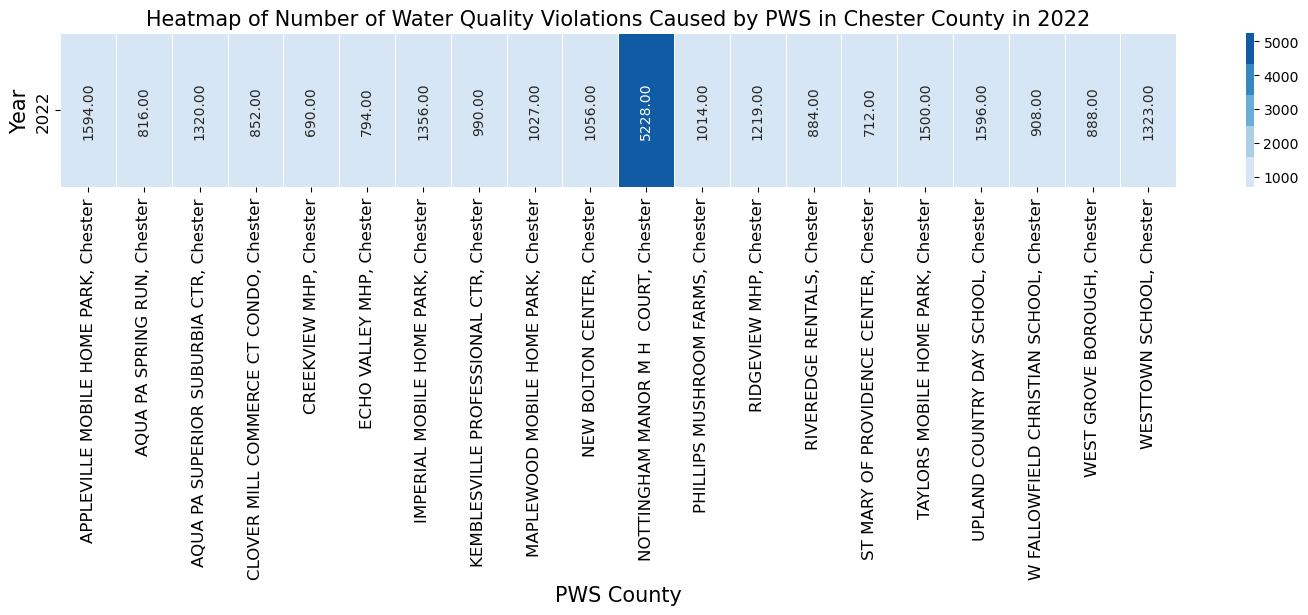

In [50]:
subset_data_chester = subset_data[subset_data.Counties_Served == 'Chester']
subset_data_chester = subset_data_chester[columns_of_interest].dropna().sort_values(by = ['No_of_Violations'], ascending = False).head(20)
subset_data_chester = subset_data_chester[columns_of_interest].sort_values(by = ['PWS_Name'])
subset_data_chester['PWS_County'] = subset_data_chester.PWS_Name.astype('string') + ', ' + subset_data_chester.Counties_Served.astype('string')
subset_data_chester.drop(['PWS_Name', 'Counties_Served'], axis = 1)
subset_data_chester = subset_data_chester.pivot(index="Year", columns="PWS_County", values="No_of_Violations")

plt.figure(figsize=(18, 2))
sns.heatmap(subset_data_chester, annot=True, annot_kws={'rotation': 90}, cmap=blue_palette, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Number of Water Quality Violations Caused by PWS in Chester County in 2022', fontsize = 15)
plt.xlabel('PWS County', fontsize = 15)
plt.ylabel('Year', fontsize = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 'vertical')
plt.show()

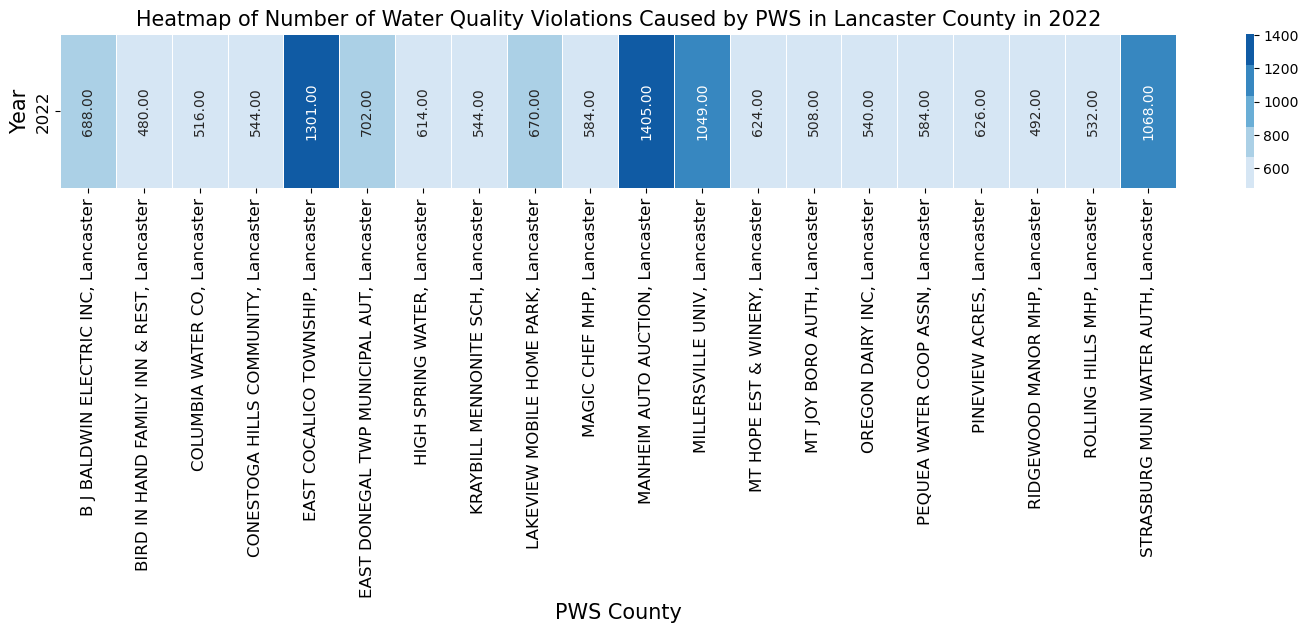

In [51]:
subset_data_lancaster = subset_data[subset_data.Counties_Served == 'Lancaster']
subset_data_lancaster = subset_data_lancaster[columns_of_interest].dropna().sort_values(by = ['No_of_Violations'], ascending = False).head(20)
subset_data_lancaster = subset_data_lancaster[columns_of_interest].sort_values(by = ['PWS_Name'])
subset_data_lancaster['PWS_County'] = subset_data_lancaster.PWS_Name.astype('string') + ', ' + subset_data_lancaster.Counties_Served.astype('string')
subset_data_lancaster.drop(['PWS_Name', 'Counties_Served'], axis = 1)
subset_data_lancaster = subset_data_lancaster.pivot(index="Year", columns="PWS_County", values="No_of_Violations")

plt.figure(figsize=(18, 2))
sns.heatmap(subset_data_lancaster, annot=True, annot_kws={'rotation': 90}, cmap=blue_palette, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Number of Water Quality Violations Caused by PWS in Lancaster County in 2022', fontsize = 15)
plt.xlabel('PWS County', fontsize = 15)
plt.ylabel('Year', fontsize = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 'vertical')
plt.show()

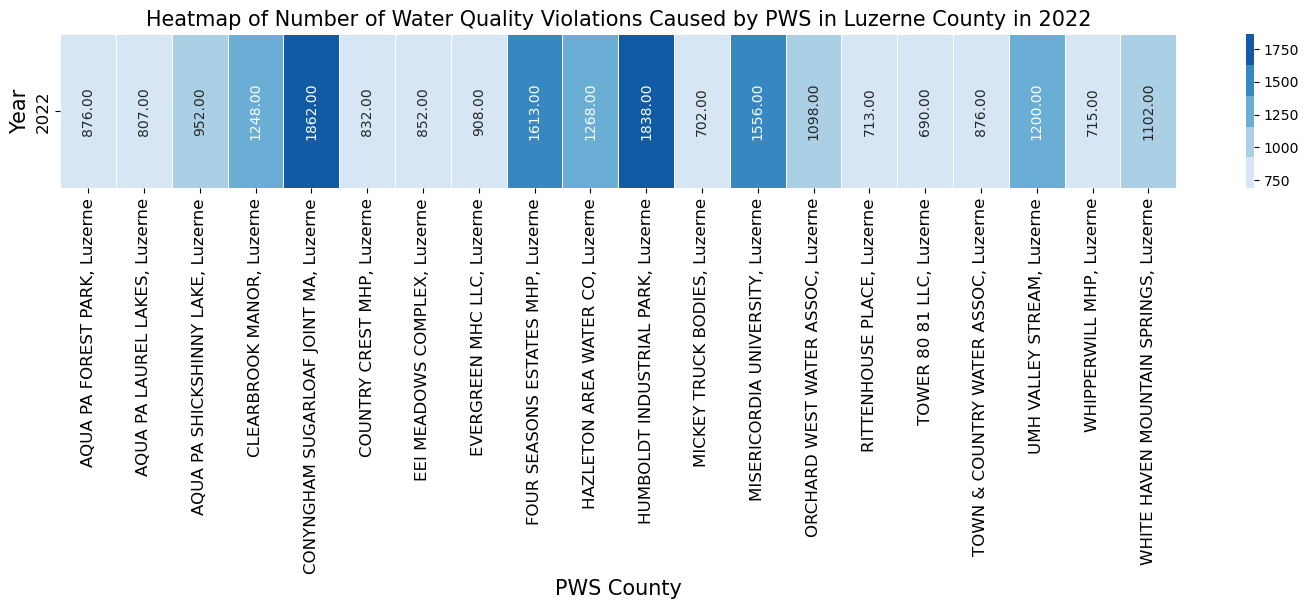

In [52]:
subset_data_luzerne = subset_data[subset_data.Counties_Served == 'Luzerne']
subset_data_luzerne = subset_data_luzerne[columns_of_interest].dropna().sort_values(by = ['No_of_Violations'], ascending = False).head(20)
subset_data_luzerne = subset_data_luzerne[columns_of_interest].sort_values(by = ['PWS_Name'])
subset_data_luzerne['PWS_County'] = subset_data_luzerne.PWS_Name.astype('string') + ', ' + subset_data_luzerne.Counties_Served.astype('string')
subset_data_luzerne.drop(['PWS_Name', 'Counties_Served'], axis = 1)
subset_data_luzerne = subset_data_luzerne.pivot(index="Year", columns="PWS_County", values="No_of_Violations")

plt.figure(figsize=(18, 2))
sns.heatmap(subset_data_luzerne, annot=True, annot_kws={'rotation': 90}, cmap=blue_palette, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Number of Water Quality Violations Caused by PWS in Luzerne County in 2022', fontsize = 15)
plt.xlabel('PWS County', fontsize = 15)
plt.ylabel('Year', fontsize = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 'vertical')
plt.show()

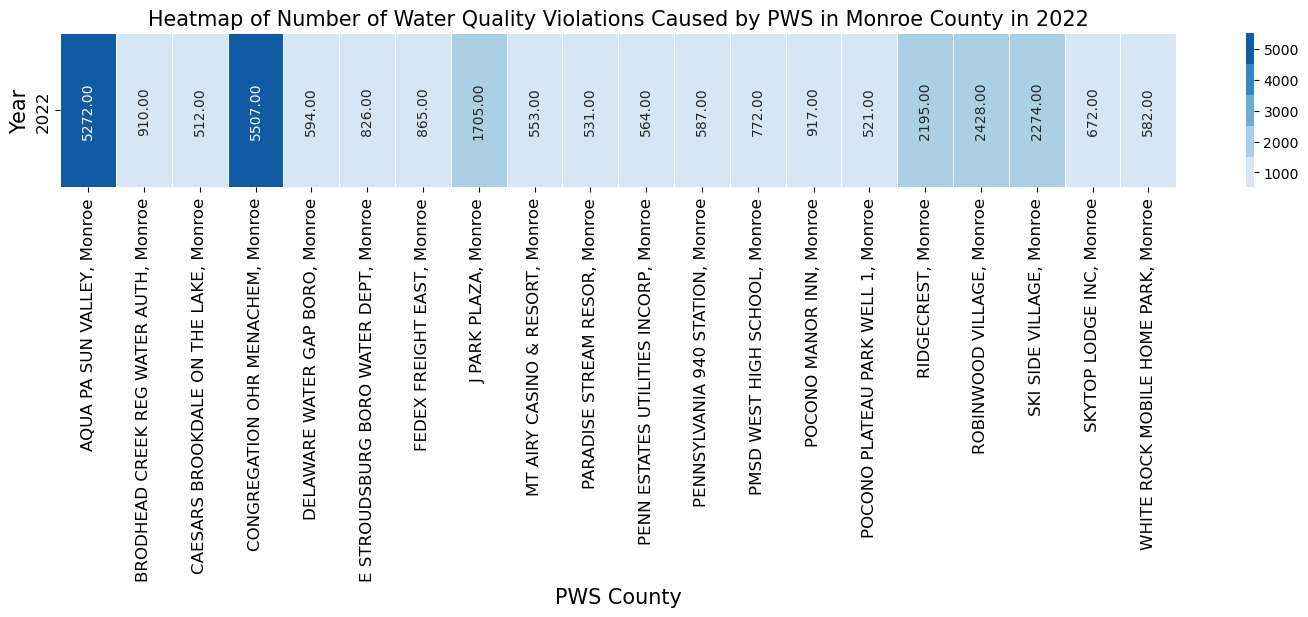

In [53]:
subset_data_monroe = subset_data[subset_data.Counties_Served == 'Monroe']
subset_data_monroe = subset_data_monroe[columns_of_interest].dropna().sort_values(by = ['No_of_Violations'], ascending = False).head(20)
subset_data_monroe = subset_data_monroe[columns_of_interest].sort_values(by = ['PWS_Name'])
subset_data_monroe['PWS_County'] = subset_data_monroe.PWS_Name.astype('string') + ', ' + subset_data_monroe.Counties_Served.astype('string')
subset_data_monroe.drop(['PWS_Name', 'Counties_Served'], axis = 1)
subset_data_monroe = subset_data_monroe.pivot(index="Year", columns="PWS_County", values="No_of_Violations")

plt.figure(figsize=(18, 2))
sns.heatmap(subset_data_monroe, annot=True, annot_kws={'rotation': 90}, cmap=blue_palette, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Number of Water Quality Violations Caused by PWS in Monroe County in 2022', fontsize = 15)
plt.xlabel('PWS County', fontsize = 15)
plt.ylabel('Year', fontsize = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 'vertical')
plt.show()

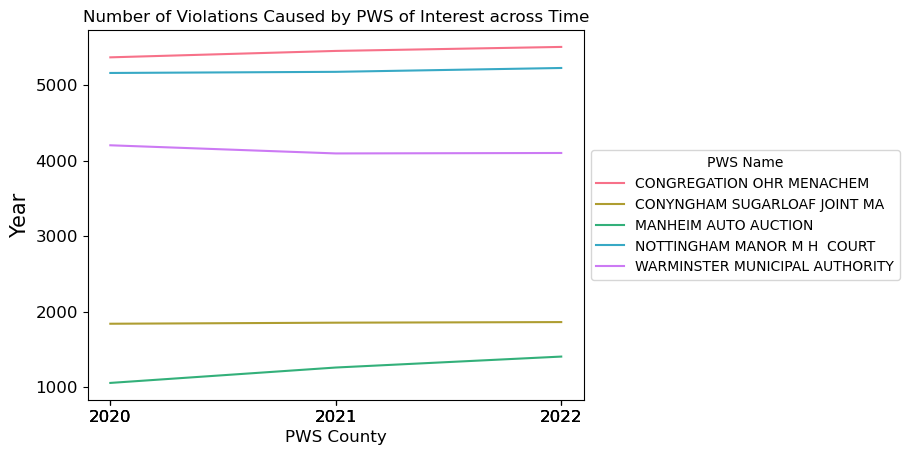

In [54]:
PWS_of_highinterest = ['WARMINSTER MUNICIPAL AUTHORITY, Bucks','NOTTINGHAM MANOR M H  COURT, Chester','MANHEIM AUTO AUCTION, Lancaster','CONGREGATION OHR MENACHEM, Monroe','CONYNGHAM SUGARLOAF JOINT MA, Luzerne']

subset_data = water_data_PWS[(water_data_PWS.PWS_Name.astype('string') + ', ' + water_data_PWS.Counties_Served.astype('string')).isin(PWS_of_highinterest)]
ax = sns.lineplot(x='Year', y='No_of_Violations', hue = 'PWS_Name', data=subset_data, palette = custom_palette_5)
plt.legend(title='PWS Name', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')    
plt.title('Number of Violations Caused by PWS of Interest across Time', fontsize = 12)
plt.xlabel('PWS County', fontsize = 12)
plt.ylabel('Year', fontsize = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_xticks(PWS_Type_data.Year)
ax.set_xticklabels(PWS_Type_data.Year)
plt.show()

In [55]:
subset_data[['PWS_Name','Counties_Served','Year','No_of_Violations','No_of_Site_Visits']]

PWS_Name Counties_Served  Year  No_of_Violations  \
4624        CONGREGATION OHR MENACHEM          Monroe  2020              5369   
4625        CONGREGATION OHR MENACHEM          Monroe  2021              5454   
4626        CONGREGATION OHR MENACHEM          Monroe  2022              5507   
4655     CONYNGHAM SUGARLOAF JOINT MA         Luzerne  2020              1840   
4656     CONYNGHAM SUGARLOAF JOINT MA         Luzerne  2021              1854   
4657     CONYNGHAM SUGARLOAF JOINT MA         Luzerne  2022              1862   
13063            MANHEIM AUTO AUCTION       Lancaster  2020              1056   
13064            MANHEIM AUTO AUCTION       Lancaster  2021              1260   
13065            MANHEIM AUTO AUCTION       Lancaster  2022              1405   
15283     NOTTINGHAM MANOR M H  COURT         Chester  2020              5162   
15284     NOTTINGHAM MANOR M H  COURT         Chester  2021              5177   
15285     NOTTINGHAM MANOR M H  COURT         Chester  2022              5228   
23534  WARMINSTER MUNICIPAL AUTHORITY           Bucks  2020              4204   
23535  WARMINSTER MUNICIPAL AUTHORITY           Bucks  2021              4096   
23536  WARMINSTER MUNICIPAL AUTHORITY           Bucks  2022              4102   

       No_of_Site_Visits  
4624                   8  
4625                  11  
4626                  12  
4655                  12  
4656                  15  
4657                  16  
13063                 12  
13064                 12  
13065                 15  
15283                 24  
15284                 25  
15285                 28  
23534                 36  
23535                 36  
23536                 38

## 5. References

1. https://stackoverflow.com/questions/21514191/check-if-pandas-column-contains-value-from-another-column
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
3. https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
4. https://sparkbyexamples.com/pandas/pandas-merge-two-dataframes-on-multiple-columns/
5. https://pandas.pydata.org/pandas-docs/version/1.4/reference/api/pandas.concat.html#pandas.concat
6. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
7. https://www.buzzfile.com/business/A-Clear-Alternative,-Inc-856-663-8088
8. https://www.buzzfile.com/business/Crystal-Clear-Water-Co.-724-290-2635
9. https://stackoverflow.com/questions/11264521/date-ticks-and-rotation
10. https://canvas.cmu.edu/courses/35619/files/10312970/download?download_frd=1
11. https://stackoverflow.com/questions/60575662/how-to-update-plotly-express-treemap-to-have-both-label-as-well-as-the-value-ins